In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

RANDOM_SEED = 42

In [2]:
data_path = './data'
data = pd.read_csv(os.path.join(data_path, 'bank+marketing', 'bank', 'bank-full.csv'), sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
Bank_Marketing_info = pd.DataFrame(data.dtypes, columns=['type']).reset_index()
Bank_Marketing_info["type"][Bank_Marketing_info["type"] == 'object'] = 'discrete'
Bank_Marketing_info["type"][(Bank_Marketing_info["type"] == 'int64') | (Bank_Marketing_info["type"] == 'float64')] = 'continuous'
Bank_Marketing_info.loc[len(Bank_Marketing_info.index)] = ['LABEL_POS', -1]
Bank_Marketing_info.to_csv('./data/bank-marketing.info', header=False, index=False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# EDA

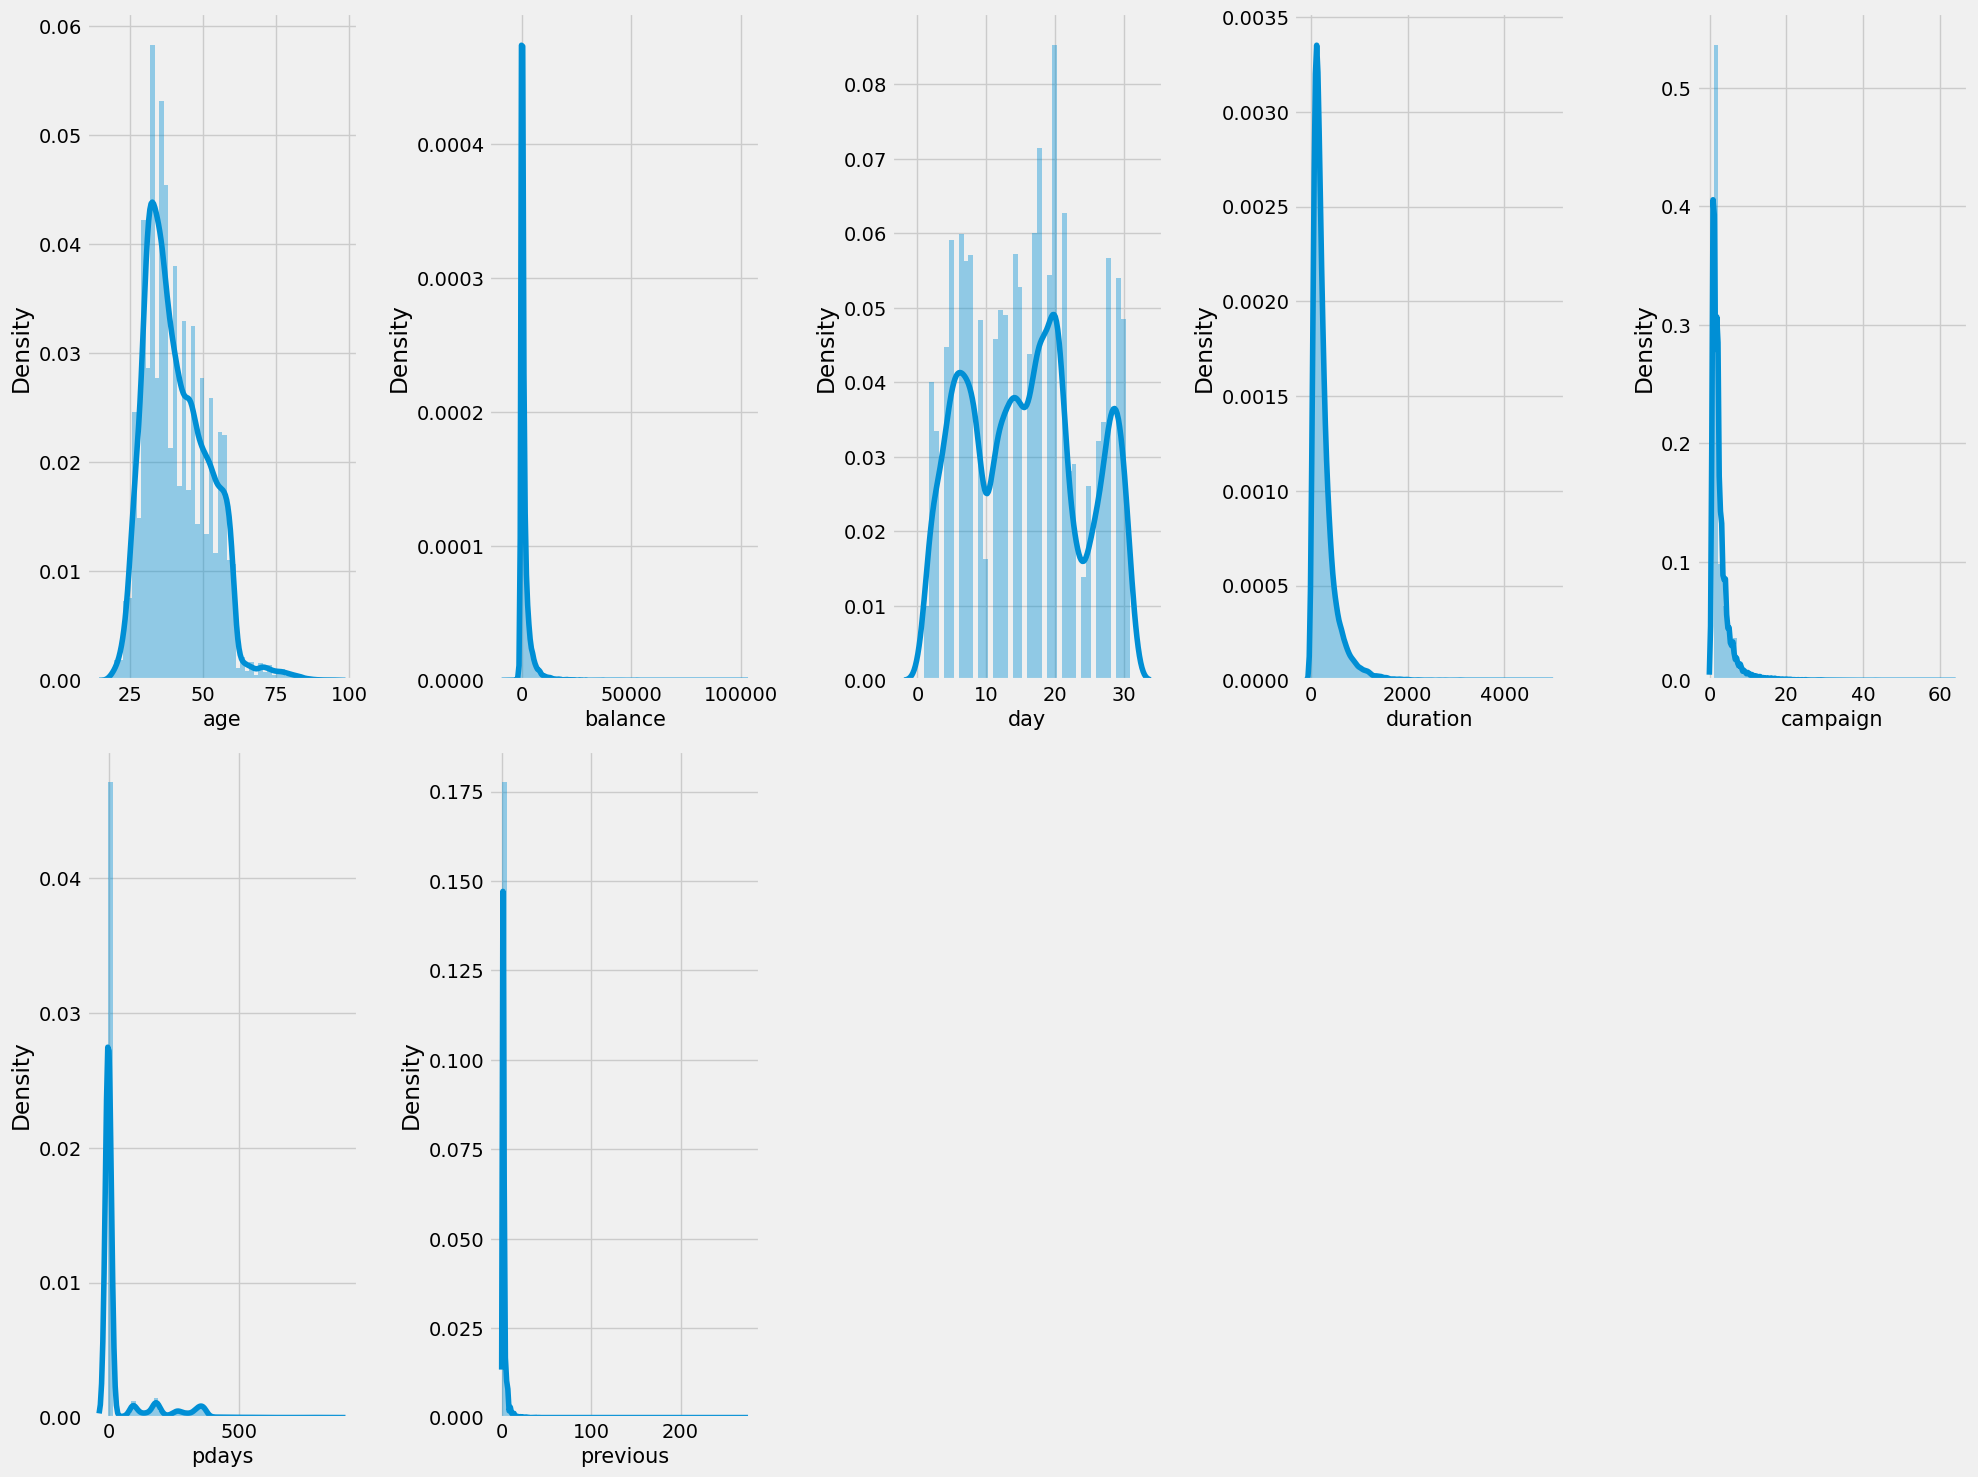

In [7]:
plt.figure(figsize = (20, 15))
numeric_var = data.dtypes[(data.dtypes == 'int64') | (data.dtypes == 'float64')].index.tolist()
for i, column in enumerate(data[numeric_var]):
    ax = plt.subplot(2, 5, i + 1)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 15)

plt.tight_layout()
plt.show()

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x = "job", data = data)
ax.set_xlabel('Job', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.set_title("Job Count Distribution", fontsize = 13)

Text(0.5, 1.0, 'Job Count Distribution')

In [9]:
# Housing loan data distribution
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
sns.countplot(x = "housing", data = data, ax = ax1, order = ['yes', 'no', 'unknown'])
ax1.set_title("Housing Loan distribution")
ax1.set_xlabel("Housing Loan")
ax1.set_ylabel("Count")

# Personal loan data distribution
sns.countplot(x = "loan", data = data, ax = ax2, order = ['yes', 'no', 'unknown'])
ax2.set_title("Personal Loan Distribution")
ax2.set_xlabel("Personal Loan")
ax2.set_ylabel("Count")

Text(0, 0.5, 'Count')

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

ValueError: could not convert string to float: 'management'

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data.corr()["MEDV"].sort_values(ascending=False)[1:],label="Correlation",color="red")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.title("the correlation between the response and predictors")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

ValueError: could not convert string to float: 'management'

RM相关性最高

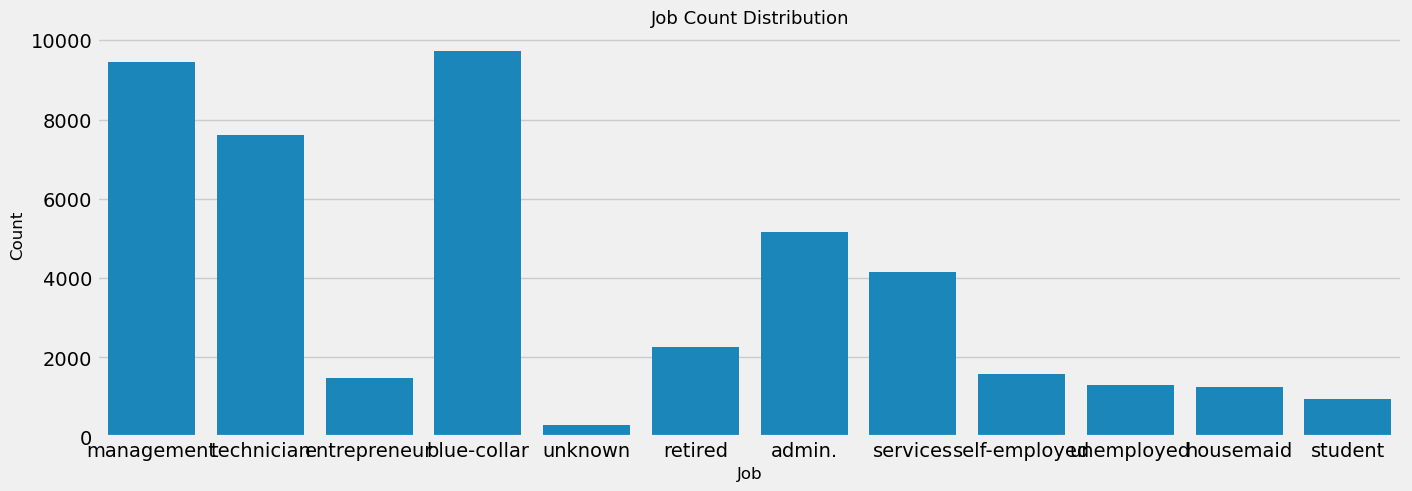

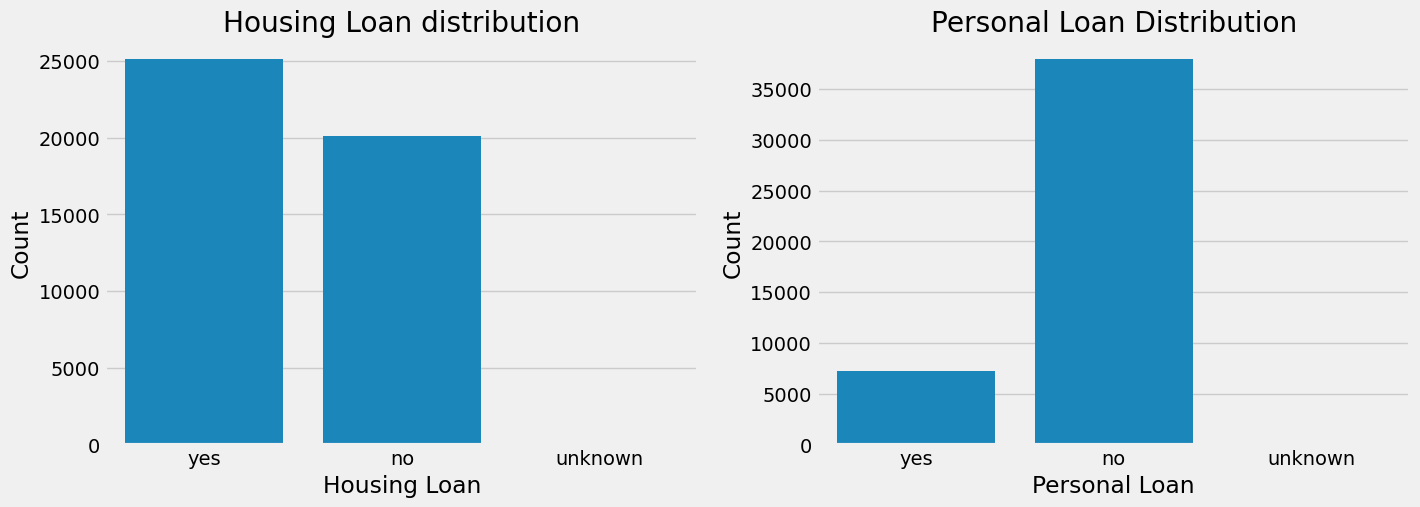

<Figure size 1400x1200 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

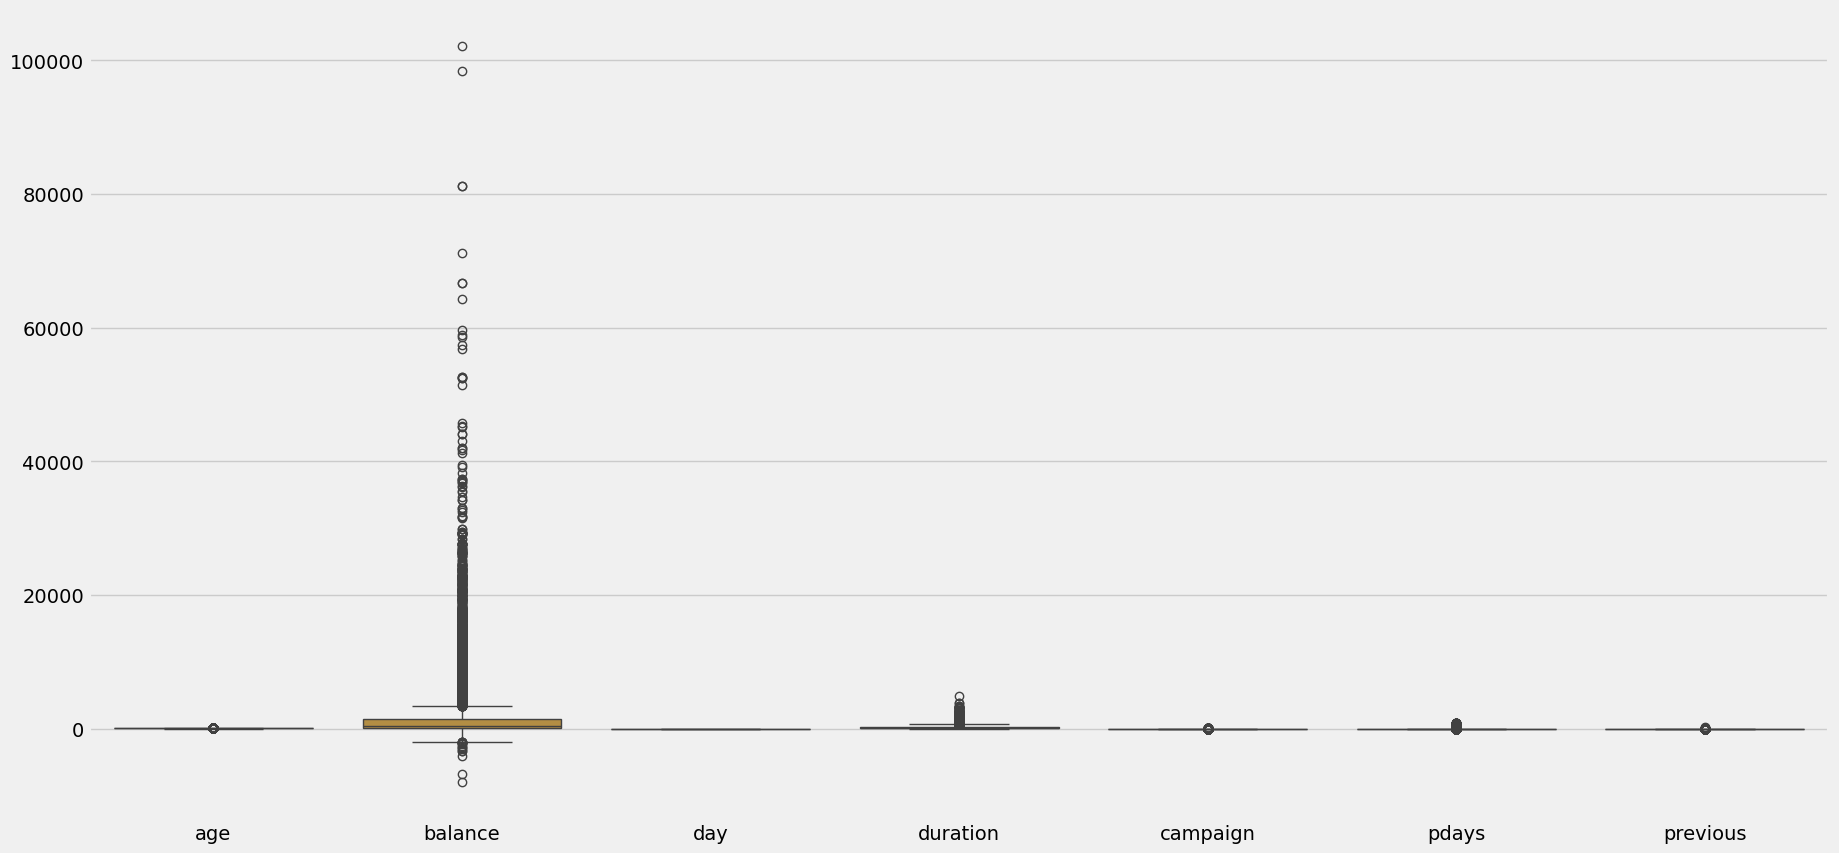

In [12]:
plt.figure(figsize=(20, 10))
sns.boxplot(data, width = 0.8)
plt.show()

需要标准化

In [13]:
plt.figure(figsize = (20, 15))

for i, column in enumerate(data):
    ax = plt.subplot(3, 5, i + 1)
    sns.regplot(x=data[column], y=data['MEDV'])

plt.tight_layout()
plt.show()

KeyError: 'MEDV'

# Data preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler

def preprocessing(data):
    X = data.iloc[:,:13]
    y = data.iloc[:,13]
    data_clean = data.fillna(data.median())
    data_clean["DIS"] = np.log(data_clean["DIS"])
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,:13], data.iloc[:,13], test_size=0.2, random_state=RANDOM_SEED)

# XGBoost

In [16]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgbr = xgb.XGBRegressor(objective='reg:squarederror')
xgbr.fit(X_train,Y_train)
Y_pred = xgbr.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
score = r2_score(Y_test,Y_pred)
print("Root Mean Square Error: %.2f" % (mse**(0.5)))
print("R square: {} %".format(round((score*100),2)))

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:job: object, marital: object, education: object, default: object, housing: object, loan: object, contact: object, month: object

In [56]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [6, 10],
           'learning_rate': [0.01, 0.08],
           'colsample_bylevel': [0.3, 0.4],
         }

xgbr = xgb.XGBRegressor(seed=RANDOM_SEED)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, Y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(0.5))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'colsample_bylevel': 0.3, 'learning_rate': 0.08, 'max_depth': 10}
Lowest RMSE:  3.7001304787485494
